This file contains function to be used to produce plots.

In [3]:
# Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plot

the function produces a graph with 

several set of data
the x ticks can be rotate
x label
y label
a title
a legend
the possibility to save the image

# Boxplot

several set of data
the x ticks can be rotate
x label
y label
a title
a legend
possibility to color the boxes
the possibility to save the image

In [74]:
# box_plot is a function to plot one boxplot in a graph
def box_plot(data, label, fill_color):
    
    bp = plt.boxplot(data,labels = [label],notch=True, whis =(10,90), patch_artist=True,showfliers=False)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

def several_boxplot(data_boxplot,text_label,climate_var,source_obs,source_modeled,full_name_climate_var,y_label_text):
    fig, ax = plt.subplots()
    colors = []
    bp=plt.boxplot(data_boxplot,labels = text_label,notch=True, whis =(10,90),patch_artist = True,showfliers=False)
    # showfliers=False permits to have the boxplot without outliers
    # documentation about boxplot
    # ... present boxplot over the period for each models
    # this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
    # here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
    # 'notch' is true to enhance part where the median is
    # 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
    # 'widths' determine width of the boxes
    # 'patch_artist' colors the boxplots
    # 'labels' gives a name to every column included in the data part

    # prepare color depending on content of labels
    for i in np.arange(0,len(text_label)):
        if ('obs' in text_label[i]) or ('Obs' in text_label[i]):
            colors.append('lightpink')
        else:
            colors.append('lightblue')
    # fill colors with vector just prepared
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.xticks(rotation=90) # to have the labels vertical
    # label axes and figure
    plt.xlabel(y_label_text)
    plt.ylabel(full_name_climate_var)
    plt.title('Boxplot presenting ditribution of '+climate_var+' data of the\n'+source_obs+' observation data vs '+source_modeled+' modeled data')
    # add legend
    ax.legend([bp['boxes'][0],bp['boxes'][1]], ['Observed', 'Modeled'])
    #plt.savefig(os.path.join(out_path,'figures','Boxplots',title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

In [ ]:
# testing functions 

In [8]:
# obs data
path_file_NOAA = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
data_obs_NOAA = pd.read_csv(path_file_NOAA)
pr_obs_NOAA_pemba=data_obs_NOAA[['DATE','PRCP']][data_obs_NOAA['NAME']=='PEMBA, MZ'].reset_index(drop=True)
pr_obs_NOAA_pemba

,DATE,PRCP
0,1973-01-20,NaN
1,1973-02-07,NaN
2,1973-02-08,NaN
3,1973-02-16,NaN
4,1973-04-04,NaN
...,...,...
11363,2020-12-27,0.0
11364,2020-12-28,NaN
11365,2020-12-29,NaN
11366,2020-12-30,NaN


In [2]:
# model data
path_NEX_GDDP_CMIP6_EmplacementStation = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014\EmplacementStationNOAA_pr_1970-2014_projectsMoz.csv'

In [12]:
data_NEX_GDDP_CMIP6_EmplacementStation = pd.read_csv(path_NEX_GDDP_CMIP6_EmplacementStation)
data_NEX_GDDP_CMIP6_EmplacementStation_pemba = data_NEX_GDDP_CMIP6_EmplacementStation[data_NEX_GDDP_CMIP6_EmplacementStation['Name station']=='PEMBA, MZ']

In [13]:
# add a coloumn with the year of the data

Year = pr_obs_NOAA_pemba[['DATE']].values.reshape(len(pr_obs_NOAA_pemba[['DATE']].values),)
for i in np.arange(0,len(pr_obs_NOAA_pemba[['DATE']].values)):
    Year[i]=int(Year[i][0:4])

pr_obs_NOAA_pemba['Year'] = Year

Year = data_NEX_GDDP_CMIP6_EmplacementStation_pemba[['Date']].values.reshape(len(data_NEX_GDDP_CMIP6_EmplacementStation_pemba[['Date']].values),)
for i in np.arange(0,len(data_NEX_GDDP_CMIP6_EmplacementStation_pemba[['Date']].values)):
    Year[i]=int(Year[i][6:10])

data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'] = Year

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_1116652\3094463528.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'] = Year


In [14]:
# Select only part of the dataframe, to have the same period in both

if max(pr_obs_NOAA_pemba['Year'])>max(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year']):
    if min(pr_obs_NOAA_pemba['Year'])>min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year']):
        start_year = min(pr_obs_NOAA_pemba['Year'])
        stop_year = max(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])
    else:
        start_year = min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])
        stop_year = max(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])        
else:
    if min(pr_obs_NOAA_pemba['Year'])>min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year']):
        start_year = min(pr_obs_NOAA_pemba['Year'])
        stop_year = max(pr_obs_NOAA_pemba['Year'])
    else:
        start_year = min(data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'])
        stop_year = max(pr_obs_NOAA_pemba['Year'])
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba = data_NEX_GDDP_CMIP6_EmplacementStation_pemba[data_NEX_GDDP_CMIP6_EmplacementStation_pemba['Year'].between(start_year,stop_year)]
pr_obs_NOAA_to_compare_pemba = pr_obs_NOAA_pemba[pr_obs_NOAA_pemba['Year'].between(start_year,stop_year)]

if max(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])>max(pr_obs_NOAA_to_compare_pemba['Year']):
    stop_year = max(pr_obs_NOAA_to_compare_pemba['Year'])
else:
    stop_year = max(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])
if min(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])>min(pr_obs_NOAA_to_compare_pemba['Year']):
    start_year = min(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'])
else:
    start_year = min(pr_obs_NOAA_to_compare_pemba['Year'])
    
pr_obs_NOAA_to_compare_pemba = pr_obs_NOAA_to_compare_pemba[pr_obs_NOAA_to_compare_pemba['Year'].between(start_year, stop_year)]
data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba[data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Year'].between(start_year, stop_year)]

In [24]:
# constructing the dictionarry for the boxplot
list_models_NEX_GDDP_CMIP6 = list(set(data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Model']))
data_boxplot = []
labels_boxplot=[]
colors = []
# add observational data
data_of_interest = pr_obs_NOAA_to_compare_pemba['PRCP'].values
data_filtered = data_of_interest[~np.isnan(data_of_interest)]
data_boxplot.append(data_filtered)
labels_boxplot.append('Obs NOAA')
colors.append('pink')
for model in list_models_NEX_GDDP_CMIP6:
    data_of_interest = data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Mean of the daily precipitation rate mm/day'][data_NEX_GDDP_CMIP6_EmplacementStation_to_compare_pemba['Model']==model].values
    data_filtered = data_of_interest[~np.isnan(data_of_interest)]
    data_boxplot.append(data_filtered)
    labels_boxplot.append(model)
    colors.append('lightblue')

In [25]:
len(data_boxplot)

16

In [27]:
labels_boxplot

['Obs NOAA',
 'MPI-ESM1-2-HR',
 'NorESM2-MM',
 'ACCESS-CM2',
 'IITM-ESM',
 'CMCC-ESM2',
 'ACCESS-ESM1-5',
 'MIROC6',
 'NESM3',
 'NorESM2-LM',
 'TaiESM1',
 'BCC-CSM2-MR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'CanESM5',
 'CMCC-CM2-SR5']

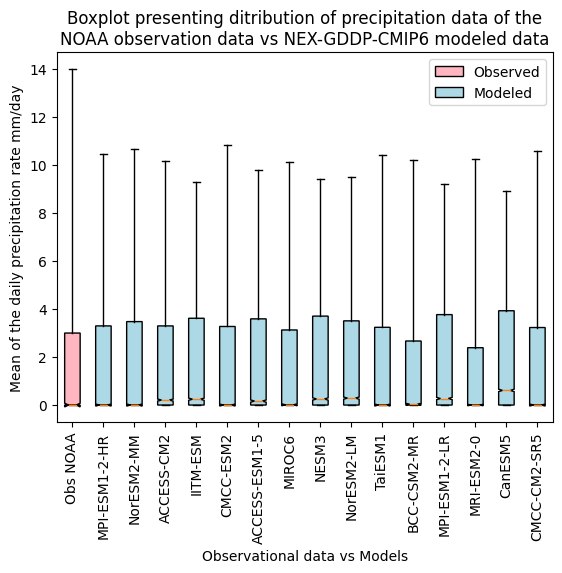

In [75]:
several_boxplot(data_boxplot,labels_boxplot,'precipitation','NOAA','NEX-GDDP-CMIP6','Mean of the daily precipitation rate mm/day','Observational data vs Models')

In [68]:
bp['boxes'][0]

In [50]:
len(labels_boxplot)

16

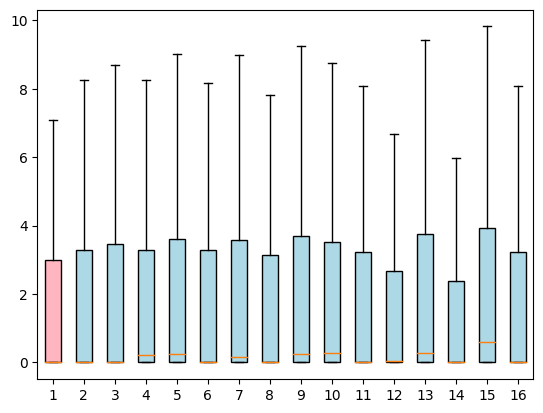

In [55]:
bp=plt.boxplot(data_boxplot,patch_artist = True,showfliers=False)
colors = ['lightpink','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

In [40]:
data_boxplot[16]

IndexError: list index out of range

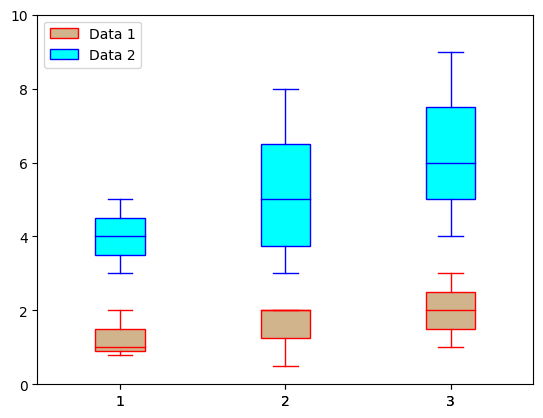

In [31]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp
    
example_data1 = [[1,2,0.8], [0.5,2,2], [3,2,1]]
example_data2 = [[5,3, 4], [6,4,3,8], [6,4,9]]

fig, ax = plt.subplots()
bp1 = box_plot(example_data1, 'red', 'tan')
bp2 = box_plot(example_data2, 'blue', 'cyan')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Data 1', 'Data 2'])
ax.set_ylim(0, 10)
plt.show()